In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torchvision
from torchvision import datasets,transforms,models

from sklearn.model_selection import train_test_split

import help
from MyDataSet import MyDataset
from medicalnet_model import generate_model

In [2]:
X_train, X_val, y_train, y_val = train_test_split(help.features,help.labels['label'].values,test_size = 0.2,random_state = 42,stratify=help.labels['label'].values)

In [3]:
train_datasets = MyDataset(datas=X_train,labels=y_train,shape=3,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='train')
val_datasets = MyDataset(datas=X_val,labels=y_val,shape=3,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='train')

train_loader = torch.utils.data.DataLoader(dataset=train_datasets, batch_size=16, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_datasets, batch_size=8, shuffle=False)

In [4]:
checkpoint = torch.load(help.checkpoint_pretrain_resnet_10_23dataset,map_location=help.device)

In [5]:
medicanet_resnet3d_10,parameters = generate_model(sample_input_W=help.input_W,
                                                   sample_input_H=help.input_H,
                                                   sample_input_D=help.input_D,
                                                   num_seg_classes=help.num_seg_classes,
                                                   phase='train',
                                                   pretrain_path=help.checkpoint_pretrain_resnet_10_23dataset)
params = [
        { 'params': parameters['base_parameters'], 'lr': 0.001 }, 
        { 'params': parameters['new_parameters'], 'lr': 0.001*100 }
        ]
optimizer = optim.Adam(params, weight_decay=1e-3)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

loading pretrained model resnet_10_23dataset.pth


Epochs: 1/100... Trian Loss:7.419... Trian Accuracy:0.400... Trian F1 Score:0.356... Val Loss:1.459... Val Accuracy:0.500... Val F1 Score:0.222
Epochs: 2/100... Trian Loss:0.750... Trian Accuracy:0.750... Trian F1 Score:0.665... Val Loss:1.828... Val Accuracy:0.233... Val F1 Score:0.212
Epochs: 3/100... Trian Loss:0.448... Trian Accuracy:0.738... Trian F1 Score:0.634... Val Loss:0.357... Val Accuracy:0.733... Val F1 Score:0.545
Epochs: 4/100... Trian Loss:0.371... Trian Accuracy:0.746... Trian F1 Score:0.619... Val Loss:0.346... Val Accuracy:0.800... Val F1 Score:0.659
Epochs: 5/100... Trian Loss:0.353... Trian Accuracy:0.762... Trian F1 Score:0.605... Val Loss:0.337... Val Accuracy:0.767... Val F1 Score:0.683
Epochs: 6/100... Trian Loss:0.338... Trian Accuracy:0.779... Trian F1 Score:0.673... Val Loss:0.349... Val Accuracy:0.750... Val F1 Score:0.634
Epochs: 7/100... Trian Loss:0.339... Trian Accuracy:0.787... Trian F1 Score:0.706... Val Loss:0.348... Val Accuracy:0.767... Val F1 Scor

Epochs: 58/100... Trian Loss:0.029... Trian Accuracy:0.983... Trian F1 Score:0.981... Val Loss:15.687... Val Accuracy:0.500... Val F1 Score:0.222
Epochs: 59/100... Trian Loss:0.008... Trian Accuracy:1.000... Trian F1 Score:1.000... Val Loss:0.342... Val Accuracy:0.883... Val F1 Score:0.850
Epochs: 60/100... Trian Loss:0.006... Trian Accuracy:1.000... Trian F1 Score:1.000... Val Loss:0.306... Val Accuracy:0.917... Val F1 Score:0.889
Epochs: 61/100... Trian Loss:0.028... Trian Accuracy:0.992... Trian F1 Score:0.989... Val Loss:0.465... Val Accuracy:0.900... Val F1 Score:0.867
Epochs: 62/100... Trian Loss:0.066... Trian Accuracy:0.971... Trian F1 Score:0.961... Val Loss:0.655... Val Accuracy:0.833... Val F1 Score:0.761
Epochs: 63/100... Trian Loss:0.009... Trian Accuracy:1.000... Trian F1 Score:1.000... Val Loss:0.264... Val Accuracy:0.950... Val F1 Score:0.933
Epochs: 64/100... Trian Loss:0.004... Trian Accuracy:1.000... Trian F1 Score:1.000... Val Loss:0.270... Val Accuracy:0.933... Val

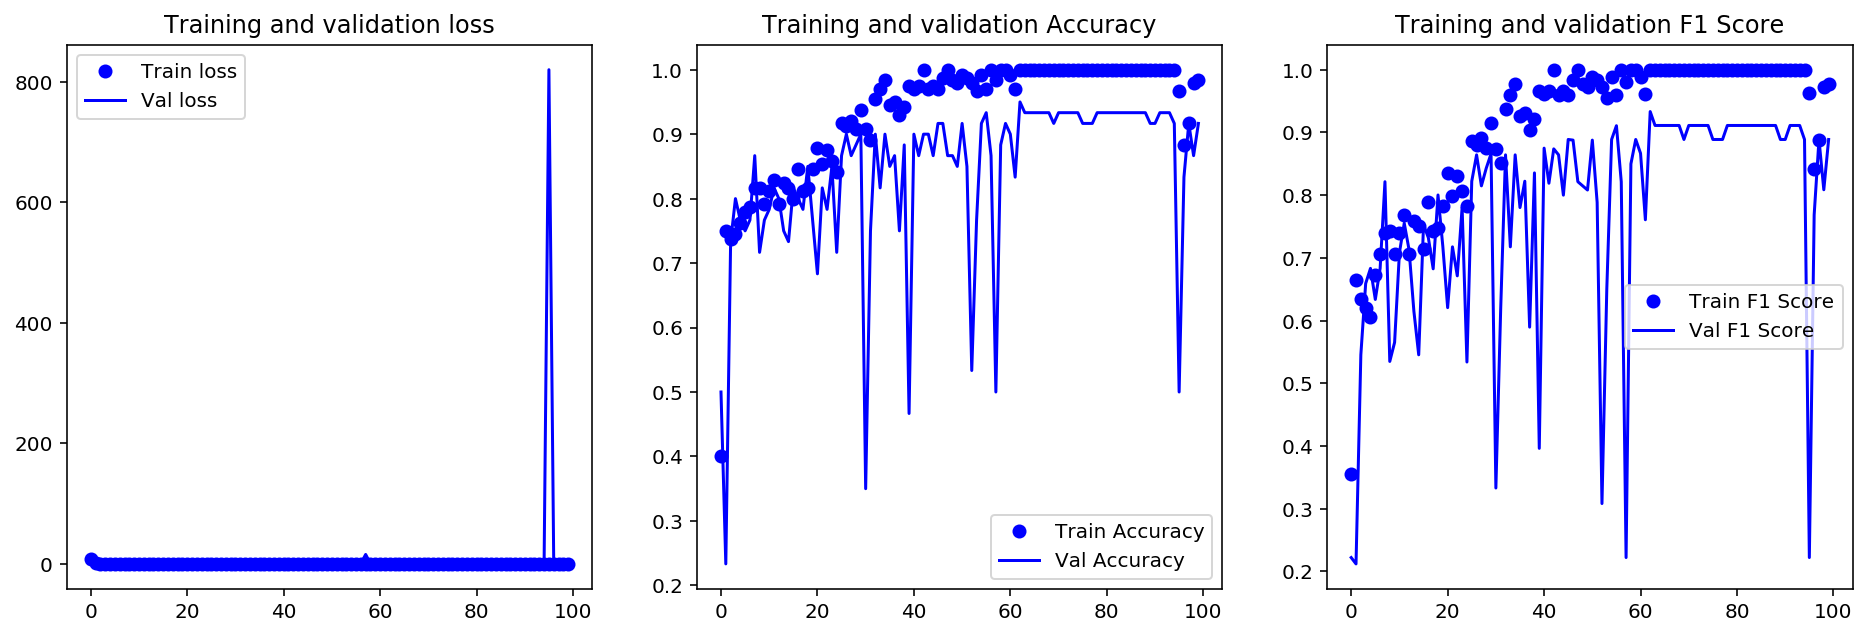

Training time is 33m 47s


In [6]:
epochs = 100
help.train_data(medicanet_resnet3d_10,train_loader,val_loader,epochs,optimizer,scheduler,help.criterion,help.medicanet_3d_resnet10_checkpoint_path,help.device)

In [7]:
test_datasets = MyDataset(datas=help.temp_data,shape=3,input_D=help.input_D,input_H=help.input_H,input_W=help.input_W,phase='test')
test_loader = DataLoader(dataset=test_datasets)

In [8]:
loadmodel = help.load_checkpoint(help.medicanet_3d_resnet10_checkpoint_path,'medicanet_resnet3d_10','test',help.device)
help.all_predict(test_loader,loadmodel,help.device,help.result_medicanet_3d_resnet10)

0 test data have been predicted
----------------------------------------
20 test data have been predicted
----------------------------------------
40 test data have been predicted
----------------------------------------
60 test data have been predicted
----------------------------------------
80 test data have been predicted
----------------------------------------
100 test data have been predicted
----------------------------------------
120 test data have been predicted
----------------------------------------
140 test data have been predicted
----------------------------------------
160 test data have been predicted
----------------------------------------
180 test data have been predicted
----------------------------------------
200 test data have been predicted
----------------------------------------
220 test data have been predicted
----------------------------------------
Test time is 0m 12s


In [2]:
loadmodel = help.load_checkpoint(help.medicanet_3d_resnet10_checkpoint_path,'medicanet_resnet3d_10','test',help.device)

In [ ]:
3,5,22,34,40,53,79,89,96,5,43,59,88,106

In [3]:
help.one_predict(help.temp_data[3],loadmodel)

(array([0.80366254, 0.1931046 , 0.00323287], dtype=float32), array([2, 0, 1]))

In [7]:
help.one_predict(help.temp_data[40],loadmodel)

(array([0.9347559 , 0.06366347, 0.00158071], dtype=float32), array([0, 2, 1]))